
# Project: Insignts into the production of a profitable & engaging movie.

## Table of Contents
<ul>
    
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project resolves around investigating and exploring TMDb movie dataset in hopes of answering some interesting research questions.

#### Research Questions 
<ul>
<li> What are the characteristics of a successful movies.</li>
<li> How has the budget trend changed over time in the creation of successful movies  </li>
<li> How is the voting participaction from viewers has changed over the years  </li>
<li> Which year has the highest release of movies?</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<ul>
<li><a href="#gp"> Data inspection</a></li>
<li><a href="#dc">Data Processing</a></li>

</ul>

<a id='gp'></a>
### Data inspection

In [2]:
#Reading data
df = pd.read_csv('tmdb-movies.csv.crdownload')

#Diaplay the first line of the dataframe.
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# number of rows and columns in the dataframe
df.shape

(10866, 21)

In [4]:
# Count of non-null values for each column and its datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Checking for duplicates.
df.duplicated().sum()

1

In [6]:
#Checking for counts of missing values.
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Checking the unique value counts.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#Checking for the count of duplicated movie titles.
df['original_title'].duplicated().value_counts()

False    10571
True       295
Name: original_title, dtype: int64

In [9]:
#checking datatype
type(df['genres'][0])

str

In [10]:
#checking the value counts of all available genres.
df['genres'].value_counts()

Drama                                              712
Comedy                                             712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
Comedy|Romance                                     268
Horror|Thriller                                    259
Horror                                             253
Comedy|Drama|Romance                               222
Drama|Thriller                                     138
Comedy|Family                                      102
Action|Thriller                                    101
Thriller                                            93
Drama|Comedy                                        92
Animation|Family                                    90
Crime|Drama|Thriller                                81
Crime|Drama                                         74
Comedy|Horror                                       72
Drama|Come

#### Findings
<ul>

<li>Sufficient dataset size.</li>
<li>Numerous useless attributes.</li>
<li>Dataset not cleaned. Dataframe has null values, duplicated values. </li>
<li>The format of the data is not processible eg. multiple genres are assigned per movie.</li>
</ul>


<a id='dc'></a>
### Data Preprocessing


Cleaning of the dataframe is needed to perform statistical analysis and data visualization.

#### Cleaning

In [11]:
#Dropping all duplicates from the dataframe.
df = df.drop_duplicates()
#Checking to make sure all duplicates were dropped from the dataframe.
df.duplicated().sum()

0

In [12]:
#Filling the null values
df = df.fillna('nan')
#Checking to make sure all null values were replaced by 'nan'
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
#Checking the number of rows and coloums in the dataframe.
df.shape

(10865, 21)

#### Formatting

In [14]:
#Checking data type for 'genres'.
type(df['genres'][0])

str

In [15]:
"""
Multiple genres were assigned to numerous movies. The format of the genres hindered any analysis thus 
preprocessing to change the format of genre is needed.
"""


#Extracting all available genres from df that has multiple genres per movie.

# Extracting the genres of all available movies.
genres_in_df = df.loc[:,'genres']

# Concatenating all extracted genres from the dataframe into a single string delimated by a pipe.
genres_string = ''
for i in genres_in_df:
    genres_string = genres_string + '|'+str(i)
    
#Extracting unique genres.    
all_genres = pd.unique(genres_string.split('|'))

#Cleaning all genres list.
all_genres = list(all_genres)
all_genres.remove('nan')
all_genres.remove('')
all_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [16]:
# Creating boolean coloums for all available gneres.

#for all available genres 
for index_genre, genre_name in enumerate(all_genres):
#     printing loop progress
#     print(index_genre)

    #coloum creation for said genre and setting boolean as false for all movie records
    df[genre_name] = 0
    
    #for all movie records
    for df_index, genres_movies in enumerate(df['genres']):
        #checking whether current movie is attributed with said genre.
        if genre_name in genres_movies:
            #setting boolean as true if yes
             df.iloc[df_index,df.columns.get_loc(genre_name)] = 1

#Removing redundant 'genres' coloum
df.drop(['genres'], axis='columns', inplace=True)

In [17]:
#Filtering out redundant attributes
df = df.loc[:,['id','imdb_id','original_title','popularity','director','runtime','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj','Action','Adventure','Science Fiction','Thriller','Fantasy','Crime','Western','Drama','Family','Animation','Comedy','Mystery','Romance','War','History','Music','Horror','Documentary','TV Movie','Foreign']]

In [18]:
#Sorting the dataframe coronologically
df.sort_values(by=['release_year','release_date'], inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis


In [19]:
def plot_descriptions(plt, xlab, ylab, title):
        
    """
    Setting plot decorators

    plt : matplotlib.pyplot
    xlab : the x axis label
    ylab : the y axis label
    title ; the title label
    """
    
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()



### Research Question 1 : What are the characteristics which define the success of a movie?

Investigating the measure of center for various variable of the dataframe and their coorelation with each other to understand what can define the success of a movie.

In [20]:
df['revenue_adj'].mean()

51369001.758842617

In [21]:
df['revenue_adj'].median()

0.0

In [22]:
df['revenue_adj'].mode()

0    0.0
dtype: float64

In [23]:
df['revenue_adj'].max()

2827123750.41189

In [24]:
df['revenue_adj'].min()

0.0

In [25]:
df.revenue_adj.quantile(0.75)

33701729.0094642

In [26]:
df.revenue_adj.quantile(0.9)

148408632.6877665

In [27]:
df['popularity'].mean()

0.64644555490105826

In [28]:
df['popularity'].median()

0.38383099999999998

In [29]:
df['popularity'].mode()

0     0.011798
1     0.021121
2     0.028143
3     0.044913
4     0.060425
5     0.065543
6     0.071830
7     0.078482
8     0.083178
9     0.090552
10    0.109305
11    0.111351
12    0.114027
13    0.122543
14    0.126182
15    0.126283
16    0.138861
17    0.143953
18    0.144297
19    0.150035
20    0.155519
21    0.158021
22    0.186995
23    0.187319
24    0.210766
25    0.210808
26    0.211695
27    0.214587
28    0.223151
29    0.227220
30    0.227580
31    0.247926
32    0.255458
33    0.265119
34    0.272995
35    0.275803
36    0.292536
37    0.317301
38    0.326556
39    0.340804
40    0.358694
41    0.363923
42    0.410235
43    0.430191
44    0.468552
45    0.506241
46    0.557155
47    0.623706
48    0.701814
49    0.984256
50    1.107689
dtype: float64

In [30]:
df['popularity'].max()

32.985762999999999

In [31]:
df['popularity'].min()

6.5000000000000008e-05

In [32]:
df.popularity.quantile(0.75)

0.713857

In [33]:
df.popularity.quantile(0.9)

1.3507702000000004

In [34]:
df['vote'] = df['vote_average']/df['vote_count']

In [35]:
df['vote'].mean(), df['vote'].median(), df['vote'].mode(), df['vote'].max(), df['vote'].min()

(0.20388162275324426, 0.15217391304347827, 0    0.5
 dtype: float64, 0.85999999999999999, 0.00080884611446708306)

In [36]:
df['vote'].quantile(0.75), df['vote'].quantile(.9)

(0.3333333333333333, 0.48333333333333334)

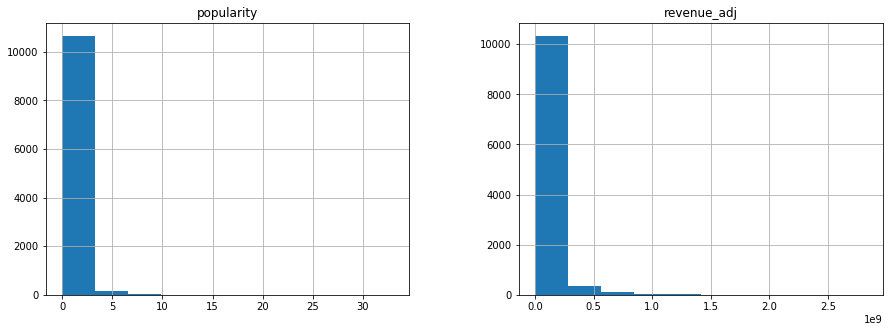

In [37]:
# Visualizing the measure of Centre.
df[['revenue_adj','popularity']].hist(figsize=(15,5));

Although the range for popularity and revenue provided from the data set is large,
the successful movies form a significantly low percentage of the data set.
The 3rd quantile will be used as filter to extract the successful movies from the whole data drame.

#### Correlation

In [38]:
 df[['revenue_adj','popularity','vote','budget_adj','runtime']].corr()

,revenue_adj,popularity,vote,budget_adj,runtime
revenue_adj,1.000000,0.609085,-0.338955,0.646627,0.175668
popularity,0.609085,1.000000,-0.409430,0.513555,0.139032
vote,-0.338955,-0.409430,1.000000,-0.418255,-0.093913
budget_adj,0.646627,0.513555,-0.418255,1.000000,0.221127
runtime,0.175668,0.139032,-0.093913,0.221127,1.000000


<ul>
<li> Revenue_adj, popularity and budget are somewhat correlated with each other. </li>
<li> Vote and runtime show insufficient correlation. </li>
</ul>

#### Assumption: 
<ul>
<li> Revenue_adj and popularity defines the success of a movie. </li>
<li> The top 25 percentile seems to describes the successful movies. </li>
</ul>




In [39]:
#Filtering out successful movies based on 75th quantile.
successful_movies = df.loc[(df['revenue_adj']>=df.revenue_adj.quantile(0.75)) & (df['popularity']>=df.popularity.quantile(0.75))]


In [40]:
successful_movies.head(1)

,id,imdb_id,original_title,popularity,director,runtime,production_companies,release_date,vote_count,vote_average,...,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,vote
10142,966,tt0054047,The Magnificent Seven,1.872132,John Sturges,128,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,...,0,0,0,0,0,0,0,0,0,0.03125


The potential categorical factors contributing to the success of a movie are: genre, director, production company.

In [41]:
# genre

#Extracting relevent genre coloums from dataframe
successful_movies_genres = successful_movies.loc[:,['Action','Adventure','Science Fiction','Thriller','Fantasy','Crime','Western','Drama','Family','Animation','Comedy','Mystery','Romance','War','History','Music','Horror','Documentary','TV Movie','Foreign']]
successful_movies_genres.head(1)

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
10142,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


successful genres are informed by the number of successful movies attributed to each genre.

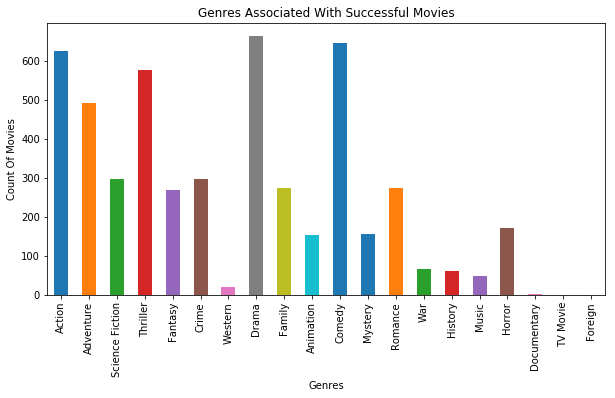

In [42]:
#Plotting the count of successful movies per genre.
successful_movies_genres.sum().plot(kind='bar', figsize= (10,5));
plot_descriptions(plt, 'Genres','Count Of Movies','Genres Associated With Successful Movies')


Action, Adventure, Thriller, Drama and Comedy are the genres with almost double the number of successful movies as compared to other genres.

In [43]:
#top 5 Genres
successful_movies_genres.sum().sort_values()[-5:]

Adventure    493
Thriller     578
Action       625
Comedy       646
Drama        665
dtype: int64

In [44]:
#directors

#Extracting the movie records of most recent directors.
successful_directors_recent = successful_movies.loc[successful_movies['release_year']>=2005]
#Extracting the top ten directors with the amount of movies produced.
successful_directors = successful_directors_recent['director'].value_counts().head(10)




The data after year 2015 was used to filter out the most recent directors and their coresponding movies in order to only select directors which are still present. This will provide us with helping insights while selecting a director if we are producing a movie.

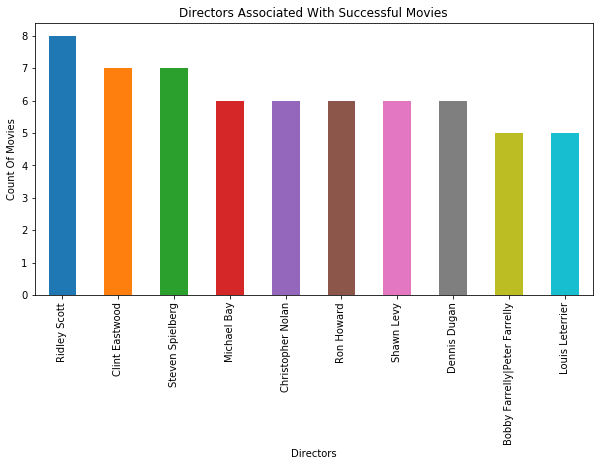

In [45]:

#Plotting
successful_directors.plot(kind='bar', figsize= (10,5));
plot_descriptions(plt, 'Directors','Count Of Movies','Directors Associated With Successful Movies')

The top ten directors with the most number of successful movies have been displayed.

In [46]:
# Top directors
successful_directors.index

Index(['Ridley Scott', 'Clint Eastwood', 'Steven Spielberg', 'Michael Bay',
       'Christopher Nolan', 'Ron Howard', 'Shawn Levy', 'Dennis Dugan',
       'Bobby Farrelly|Peter Farrelly', 'Louis Leterrier'],
      dtype='object')

In [47]:
#Production Companies

#Creating a series with all the production companies with in the successful movies dataframe along with their count.
production_companies_value_count = pd.Series(successful_movies['production_companies'].str.cat(sep='|').split('|')).value_counts()
#Selecting top ten production companies.
successful_production_companies = production_companies_value_count.head(10)

The production companines with the most number of successful movies were filtered out as the best.

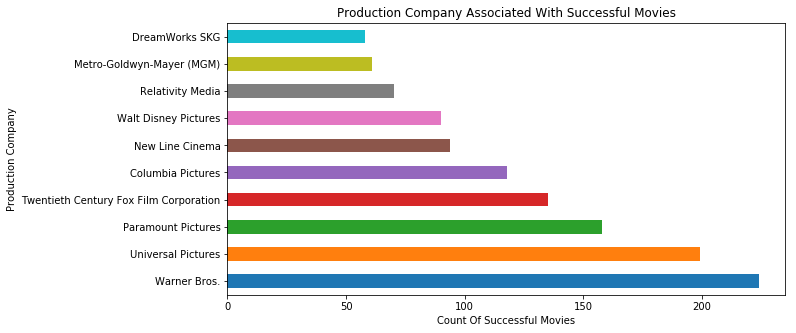

In [48]:
#Plotting
successful_production_companies.plot(kind='barh', figsize= (10,5));
plot_descriptions(plt,'Count Of Successful Movies','Production Company','Production Company Associated With Successful Movies')

The top ten production companies with the most number of successful movies have been displayed.

In [49]:
#Top ten Production Companies
successful_production_companies.index

Index(['Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'New Line Cinema', 'Walt Disney Pictures', 'Relativity Media',
       'Metro-Goldwyn-Mayer (MGM)', 'DreamWorks SKG'],
      dtype='object')



### Research Question 2: Names of most successful movies?

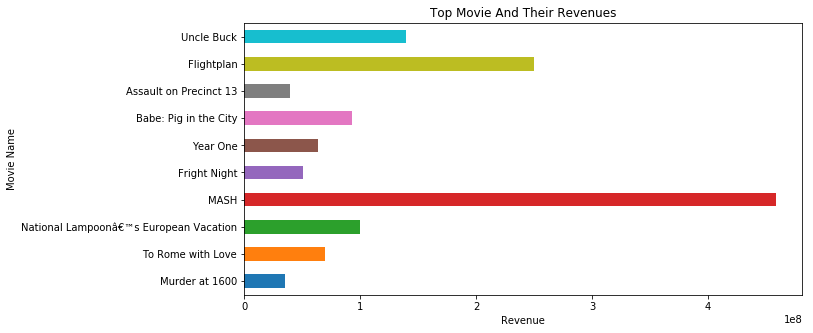

In [50]:
#Successful movies

#Sorting the successful movies based on popularity and revenue.
top_ten = successful_movies.sort_values(['popularity','revenue_adj'])[['original_title','revenue_adj']].head(10)
#Resetting the index
top_ten.index = top_ten.original_title
#Dataframe to Series conversion with relevent coloum.
top_ten = top_ten.drop('original_title', axis=1).squeeze()
#Plotting
top_ten.plot(kind='barh', figsize= (10,5));
plot_descriptions(plt,'Revenue','Movie Name','Top Movie And Their Revenues')

Popularity and revenue were used to filter out the top 10 movies in the dataset.

### Research Question 2: How has the budget trend changed over time in the creation of successful movies ?

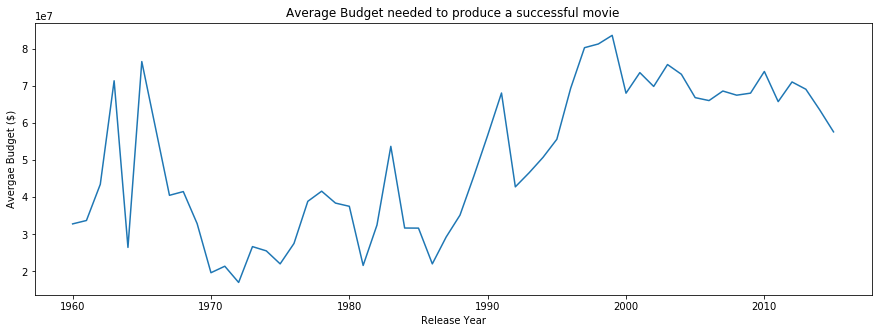

In [51]:
# Budget trent

#Filtering yearly mean budget.
successful_budget_year = successful_movies.groupby('release_year')['budget_adj'].mean()
#PLotting
successful_budget_year.plot(figsize=(15,5));
plot_descriptions(plt,'Release Year','Avergae Budget ($)','Average Budget needed to produce a successful movie')

The time-series trend for the mean budget associated with successful movies per year is being shown.


### Research Question 3: How is the voting participaction from viewers changed over the years  ?

In [52]:
df[df['vote_count']>=1000]['vote_count'].count()

564

In [53]:
df['vote_count'].max()

9767

In [54]:
df['vote_count'].min()

10

In [55]:
df['vote_count'].mean()

217.39963184537507

In [56]:
df.vote_count.quantile(0.75)

146.0

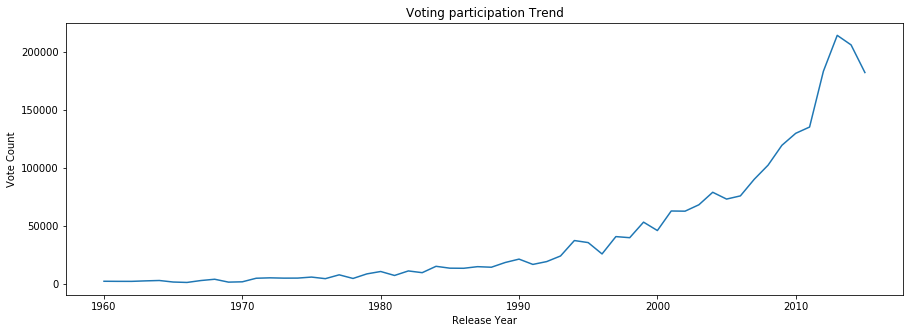

In [57]:
# Vote

#Filtering sum of vote count per year. 
vote_count_year = df.groupby('release_year')['vote_count'].sum()
#PLotting
vote_count_year.plot(figsize=(15,5));
plot_descriptions(plt,'Release Year','Vote Count','Voting participation Trend')

The time-series trend showing the number of votes casted for successful movies per year is being shown.

In [58]:
# Conclusion: 
vote_count_year[vote_count_year==vote_count_year.max()]

release_year
2013    214486
Name: vote_count, dtype: int64


### Research Question 4: Which year has the highest release of movies?

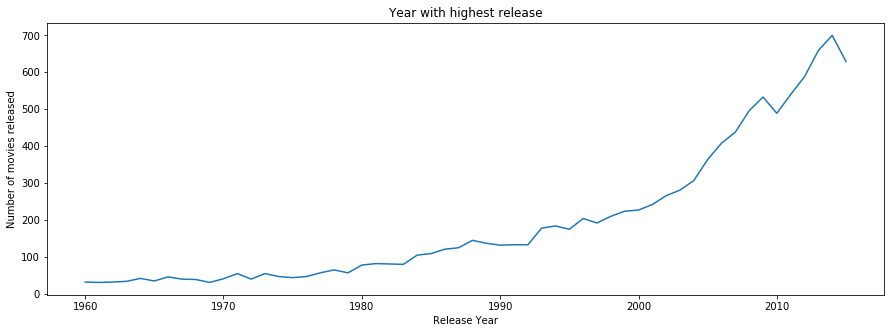

In [59]:

movie_count_year = df.groupby('release_year')['release_year'].count()

movie_count_year.plot(figsize=(15,5));
plot_descriptions(plt,'Release Year','Number of movies released','Year with highest release')


The time-series trend for the number of successfull movies released per year is being shown.

In [60]:
 movie_count_year[movie_count_year == max(movie_count_year)]

release_year
2014    700
Name: release_year, dtype: int64

<a id='conclusions'></a>
## Conclusions

<ul>
<li>It was observed that the succesfull movies shared the following properties:
    <ul>
    <li>They were one of these five genres: Adventure, Thriller, Action,Comedy, Drama. </li>
   <li> They were directed by one of these ten directors: Ridley Scott,Steven Spielberg, Clint Eastwood,Shawn Levy, Michael Bay  Christopher Nolan, Ron Howard, Dennis Dugan, Peter Jackson, Francis Lawrence.</li>
    <li>They were produced by one of these ten production companies:
    Warner Bros, Universal Pictures, Paramount Pictures,
       Twentieth Century Fox Film Corporation, Columbia Pictures,
       New Line Cinema, Walt Disney Pictures, Relativity Media,
     Metro-Goldwyn-Mayer (MGM), DreamWorks SKG.</li>
        </ul>

<li>It was observed that the following are the top ten successful movies in terms of their revenue and popularity:Murder at 1600, To Rome with Love,National Lampoonâ€™s European Vacation, MASH, Fright Night, Year One, Babe: Pig in the City, Assault on Precinct 13, Flightplan, Uncle Buck.</li> 

<li>From the year between 1970s and 1990s a low budget was required to produce a successful movie however the trend fluctuated drastically from year to year. After the 1990s we can observe that comparatively more budget is needed to produce a successful movie and the fluctuation in this trend is limited.</li>

<li> The rate of participation in voting for movies was stagnent and almost nonexistant between 1960s to 1980s. The trend, then, experienced a gradual increase till date. 2013 marked the highest voting rate with 214486 votes.</li>

<li> The rate of production of movies was stagnent and low between 1960s to 1990s. The trend, then, experienced a drastic increase till date. 2014 marked the highest rate of movies produced with 700 movies.</li>
</ul>

### Limitations 
<ul>
<li> The data for successful movies is limited, restricting analysis.</li>
<li> The nature of some of the variable limited their relevance to the time-series analysis eg. the lifespace of directors is not taken into consideration while analysing the top ten directors. The success of any director was only informed by the number of movies they were able to direct. This is not the sole factor which should be taken into consideration while quantifying the quality of a directors work.</li>
</ul>